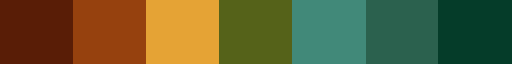

In [1]:
from purrpalette import PurrPalette

purr = PurrPalette()
cmap = purr.load_cmap('Degas')
cmap

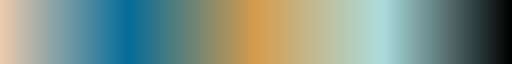

In [2]:
from purrpalette import PurrPalette

purr = PurrPalette()
cmap = purr.load_cmap('Darjeeling2', type='continuous')
cmap

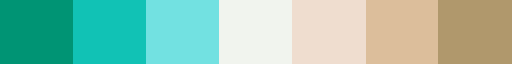

In [70]:
from purrpalette import PurrPalette

purr = PurrPalette()
cmap = purr.load_cmap()
cmap

In [35]:
from purrpalette import PurrPalette

purr = PurrPalette()
purr.source('bilbao')

'The R package: {khroma}'

In [39]:
from purrpalette import PurrPalette

purr = PurrPalette()
purr.hex('42e4b0')

['#000000', '#14213D', '#FCA311', '#E5E5E5', '#FFFFFF']

In [1]:
from purrpalette import PurrPalette

purr = PurrPalette()
purr.rgb('AirNomads')

[(255, 153, 51),
 (194, 72, 65),
 (255, 255, 51),
 (139, 91, 69),
 (135, 175, 209),
 (238, 176, 90),
 (219, 197, 160)]